### Probablity & Statistics project 
### Kiarash GheysariPour 402102302

### Markov Chain Questions : 
### Q1 : 

The term "memoryless" comes from the fact that, at any given point in time, the future evolution of the system does not depend on its past history. The process "forgets" its past and only "remembers" its current state. This is a key feature of the Markov property: knowing the present state is sufficient to predict the future, and the history or sequence of prior states does not provide any additional information.

### Q2 :
Given the transition matrix:
$$
P = \begin{pmatrix}
0.7 & 0.3 \\
0.4 & 0.6
\end{pmatrix}
$$

$$
\mathbf{s_0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
$$

$$
\mathbf{s_1} = P \cdot \mathbf{s_0} = \begin{pmatrix} 0.7 & 0.3 \\ 0.4 & 0.6 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0.7 \\ 0.4 \end{pmatrix}
$$
$$
\mathbf{s_2} = P \cdot \mathbf{s_1} = \begin{pmatrix} 0.7 & 0.3 \\ 0.4 & 0.6 \end{pmatrix} \cdot \begin{pmatrix} 0.7 \\ 0.4 \end{pmatrix}
$$

$$
\mathbf{s_2} = \begin{pmatrix} 0.61 \\ 0.52 \end{pmatrix}
$$


### Q3 :
Given the transition matrix \(P\):

$$
P = \begin{pmatrix}
0.5 & 0.2 & 0.3 \\
0.3 & 0.4 & 0.3 \\
0.4 & 0.3 & 0.3
\end{pmatrix}
$$

$$
\pi_1 + \pi_2 + \pi_3 = 1
$$

The equation $\pi \cdot P = \pi$ can be written as a system of linear equations:

$$
\begin{pmatrix} \pi_1 & \pi_2 & \pi_3 \end{pmatrix} \cdot \begin{pmatrix} 0.5 & 0.2 & 0.3 \\ 0.3 & 0.4 & 0.3 \\ 0.4 & 0.3 & 0.3 \end{pmatrix} = \begin{pmatrix} \pi_1 & \pi_2 & \pi_3 \end{pmatrix}
$$


1. $ \pi_1 = 0.5\pi_1 + 0.3\pi_2 + 0.4\pi_3 $
2. $ \pi_2 = 0.2\pi_1 + 0.4\pi_2 + 0.3\pi_3 $
3. $ \pi_3 = 0.3\pi_1 + 0.3\pi_2 + 0.3\pi_3 $
4. $ \pi_1 + \pi_2 + \pi_3 = 1 $

after solving the system abpve we'll have : 


$$
\pi = \begin{pmatrix} 0.4125 & 0.2875 & 0.3 \end{pmatrix}
$$

### Q4 : 

Ergodicity in a Markov chain means that, over time, the chain will visit all possible states and its long-term behavior will converge to a unique stationary distribution, regardless of the starting state.

For a chain to be ergodic:
1. **Irreducibility**: Every state can be reached from any other state.
2. **Aperiodicity**: The chain doesn't cycle in fixed periods.
3. **Positive recurrence**: The chain revisits states infinitely often in finite time.

Ergodicity ensures **convergence** to a stationary distribution, where the probabilities of being in each state stabilize over time. Non-ergodic chains may fail to converge or may exhibit periodic behavior.

### Simulation question 1.1 : 

in this part we'll try to estimate pi using monte carlo methods by generating random points in a square and seeing how many of them fall into the circle fitted into the square<br>
seems simple enough !

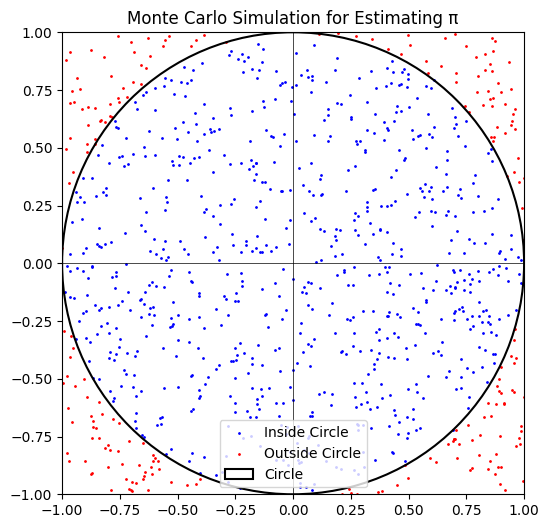

Estimated value of pi (using 1000 points): 3.12


In [1]:
import random
import matplotlib.pyplot as plt

def estimate_pi(num_points, plot=False):
    points_inside_circle = 0
    x_inside, y_inside = [], []  # Points inside the circle
    x_outside, y_outside = [], []  # Points outside the circle

    for _ in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        if x**2 + y**2 <= 1:
            points_inside_circle += 1
            if plot:
                x_inside.append(x)
                y_inside.append(y)
        else:
            if plot:
                x_outside.append(x)
                y_outside.append(y)

    if plot:
        plt.figure(figsize=(6, 6))
        plt.scatter(x_inside, y_inside, color="blue", s=1, label="Inside Circle")
        plt.scatter(x_outside, y_outside, color="red", s=1, label="Outside Circle")
        circle = plt.Circle((0, 0), 1, color="black", fill=False, linewidth=1.5, label="Circle")
        plt.gca().add_artist(circle)
        plt.axhline(0, color="black", linewidth=0.5)
        plt.axvline(0, color="black", linewidth=0.5)
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title("Monte Carlo Simulation for Estimating π")
        plt.legend()
        plt.show()

    # Estimate π
    return 4 * points_inside_circle / num_points

num_points = 1000
estimated_pi = estimate_pi(num_points, plot=True)
print(f"Estimated value of pi (using {num_points} points): {estimated_pi}")


### Simulation Question 1.2 : 

in the simulation below its evident that with increasing the sample size the mean gets closer and closer to zero **(not necessarily everytime , well... ,because of randomness ;D )**
and the results are compatible with LLN because by the law of large numbers we expect the sample mean to get closer to the mean of the RV's as n grows larger which is what we're seeing here more or less

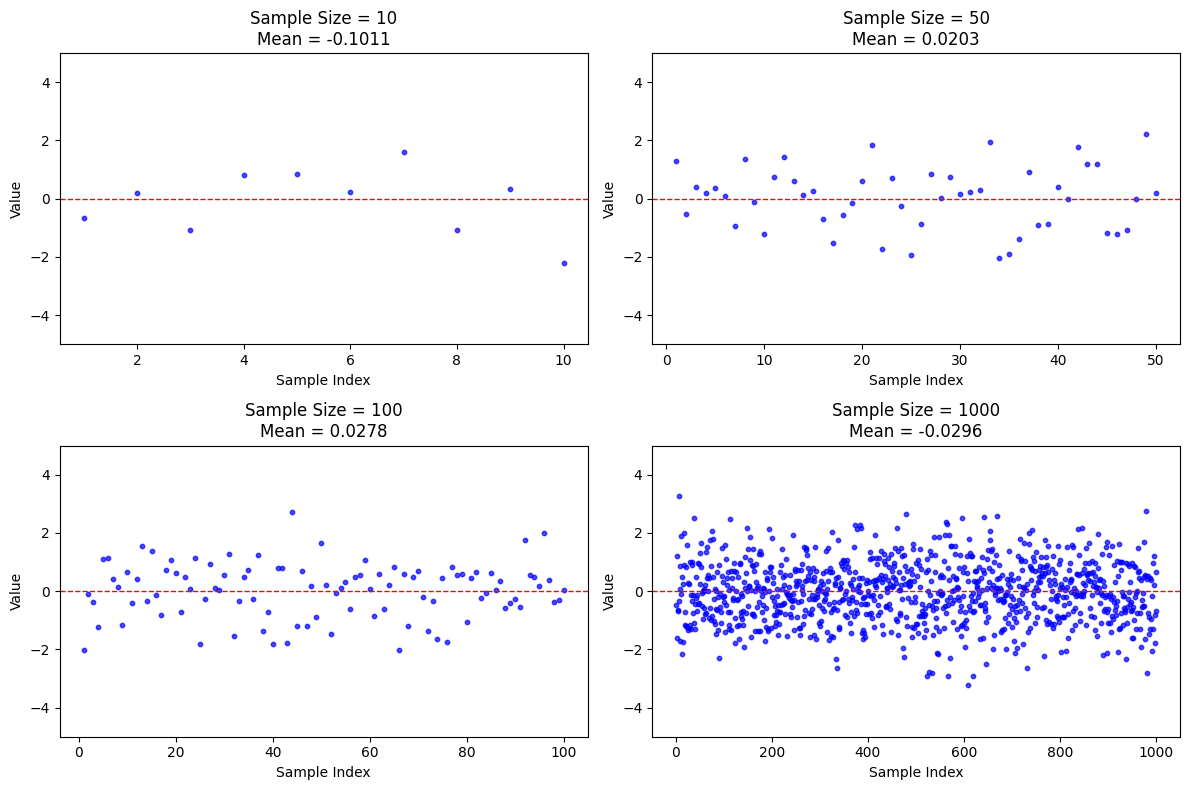

Sample Size = 10, Mean = -0.1011
Sample Size = 50, Mean = 0.0203
Sample Size = 100, Mean = 0.0278
Sample Size = 1000, Mean = -0.0296


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_plot_samples():
    sample_sizes = [10, 50, 100, 1000]
    means = []

    plt.figure(figsize=(12, 8))

    for i, n in enumerate(sample_sizes):
        samples = np.random.normal(loc=0, scale=1, size=n)

        sample_mean = np.mean(samples)
        means.append(sample_mean)

        plt.subplot(2, 2, i + 1)
        plt.scatter(range(1, n + 1), samples, color="blue", s=10, alpha=0.7)
        plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
        plt.title(f"Sample Size = {n}\nMean = {sample_mean:.4f}")
        plt.xlabel("Sample Index")
        plt.ylabel("Value")
        plt.ylim(-5, 5)

    plt.tight_layout()
    plt.show()

    for size, mean in zip(sample_sizes, means):
        print(f"Sample Size = {size}, Mean = {mean:.4f}")

generate_and_plot_samples()

    


### Simulation Question 1.3 : 

it's evident that with increasing the sample size the accuracy for this estimation increases 
this shows us a basic fact about monte carlo method that its accuracy has a positive relation with sample size

In [1]:
import numpy as np

def estimate_variance_exponential(lambda_param, num_samples):
    samples = np.random.exponential(scale=1/lambda_param, size=num_samples)

    sample_variance = np.var(samples, ddof=1)  

    theoretical_variance = 1 / (lambda_param**2)

    return sample_variance, theoretical_variance

lambda_param = 2  # Rate parameter
num_samples = [1000 , 10000 , 100000]  # Number of samples

for i , n in enumerate(num_samples):
    estimated_variance, theoretical_variance = estimate_variance_exponential(lambda_param, n)
    print(f"Estimated Variance for {n} Samples (Monte Carlo): {estimated_variance:.4f}")
    
print(f"Theoretical Variance: {theoretical_variance:.4f}")


Estimated Variance for 1000 Samples (Monte Carlo): 0.2402
Estimated Variance for 10000 Samples (Monte Carlo): 0.2449
Estimated Variance for 100000 Samples (Monte Carlo): 0.2434
Theoretical Variance: 0.2500


### Simulation Question 1.4 :

what we're doing here is that we're taking samples of the mean for different sample sizes and were seeing how they're scattered. the central limit theorem tells us that with increasing the sample size the distribution takes the shape of $ N\left(0, \frac{\sigma}{\sqrt{n}}\right) $







Sample Size = 10, Mean of Sample Means = 0.4995
Sample Size = 50, Mean of Sample Means = 0.5023
Sample Size = 100, Mean of Sample Means = 0.5014
Sample Size = 1000, Mean of Sample Means = 0.5001


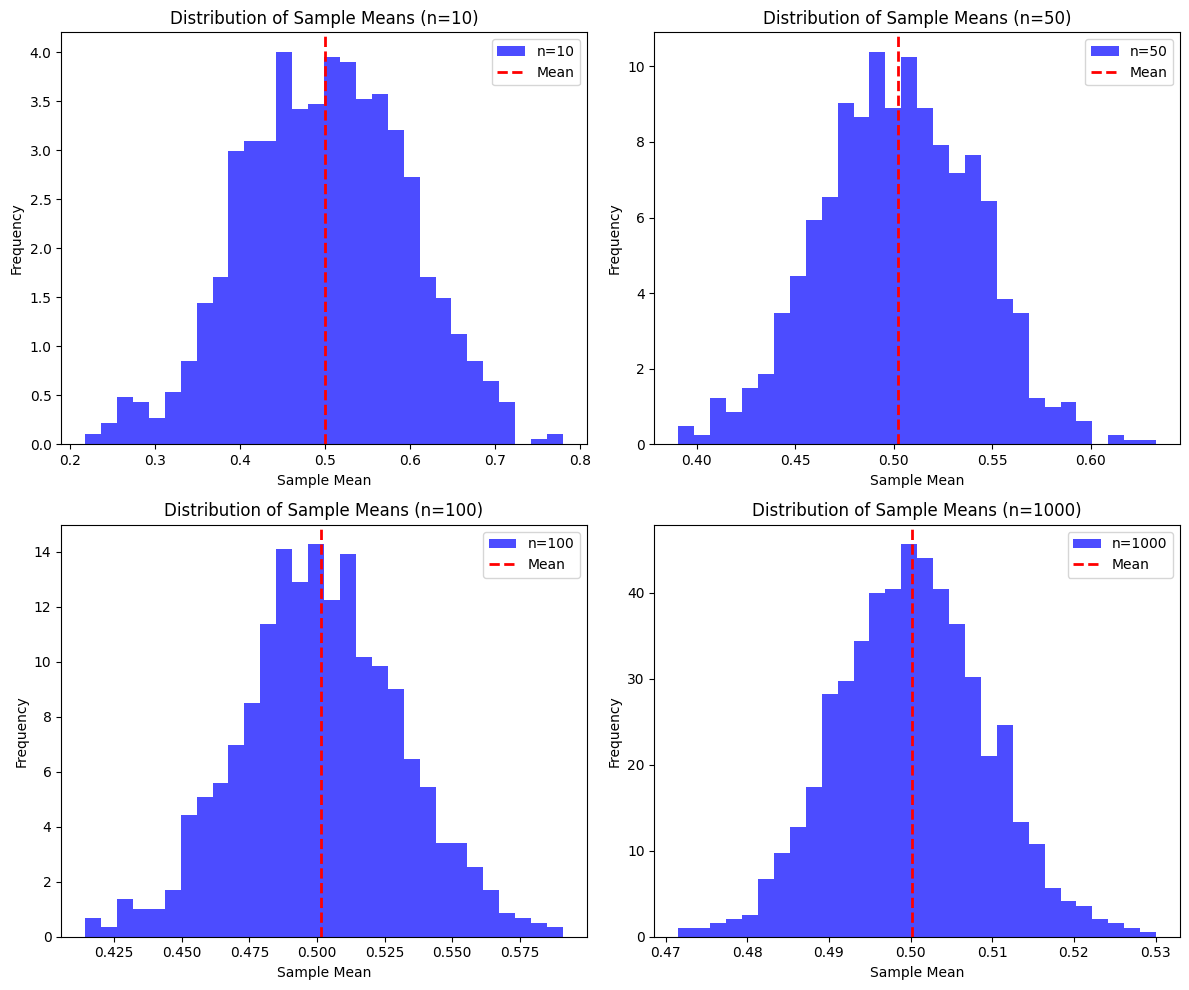

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_uniform_and_plot():
    sample_sizes = [10, 50, 100, 1000]
    
    num_iterations = 1000
    
    plt.figure(figsize=(12, 10))
    
    for i, n in enumerate(sample_sizes):
        sample_means = []
        for _ in range(num_iterations):
            samples = np.random.uniform(0, 1, size=n)
            sample_means.append(np.mean(samples))
        
        plt.subplot(2, 2, i + 1)
        plt.hist(sample_means, bins=30, density=True, color='blue', alpha=0.7, label=f"n={n}")
        plt.axvline(np.mean(sample_means), color='red', linestyle='--', linewidth=2, label="Mean")
        plt.title(f"Distribution of Sample Means (n={n})")
        plt.xlabel("Sample Mean")
        plt.ylabel("Frequency")
        plt.legend()

        print(f"Sample Size = {n}, Mean of Sample Means = {np.mean(sample_means):.4f}")

    plt.tight_layout()
    plt.show()

# Run the simulation
simulate_uniform_and_plot()

### Simulation question 1.5 :

based on the formula for the 95 percent confidence interval which is derived from CLT **(the distribution tends to : $ N\left(0, \frac{\sigma}{\sqrt{n}}\right) $)** that is written below , its evident that increasing the sample size shrinks the confidence interval .
$$\text{95\% Confidence Interval} = \bar{x} \pm 1.96 \cdot \frac{s}{\sqrt{n}}$$



In [3]:
import numpy as np

def simulate_uniform_and_calculate_percentiles():
    sample_sizes = [10, 50, 100, 1000]

    num_iterations = 1000

    for n in sample_sizes:
        sample_means = []
        for _ in range(num_iterations):
            samples = np.random.uniform(0, 1, size=n)
            sample_means.append(np.mean(samples))

        lower_bound = np.percentile(sample_means, 2.5)
        upper_bound = np.percentile(sample_means, 97.5)

        print(f"Sample Size = {n}, Mean of Sample Means = {np.mean(sample_means):.4f}")
        print(f"95% Range for Sample Size {n}: [{lower_bound:.4f}, {upper_bound:.4f}]\n")

simulate_uniform_and_calculate_percentiles()


Sample Size = 10, Mean of Sample Means = 0.5003
95% Range for Sample Size 10: [0.3310, 0.6725]

Sample Size = 50, Mean of Sample Means = 0.4992
95% Range for Sample Size 50: [0.4208, 0.5805]

Sample Size = 100, Mean of Sample Means = 0.4991
95% Range for Sample Size 100: [0.4425, 0.5566]

Sample Size = 1000, Mean of Sample Means = 0.5000
95% Range for Sample Size 1000: [0.4806, 0.5179]



### Simulation question 1.6 & 1.7

what we've done in the code below is that we're calculating the 95 percent confidence interval for differnet sample sizes . this is a good metric on how increasing the sample size effects the length of the 95% C.I. for different distributions.<br>
the trend that we're witnessing in this simuations output is that all the distributions follow an inverse relationship between C.I. length and sample size (n) , which is what we expected and saw in the previous question .<br> but comparing the C.I. length for different dist. its evident that the cauchy dist. has a much longer interval comparing to Uniform and Normal dist. which is explainable by comparing the tails of the distributions , the tail for the Uniform dist. is literally 0 , for Normal its $O(\exp(-x^2))$  and for cauchy its $O\left(\frac{1}{x^2}\right)$. <br> the cauchy tail is a much fatter tail than the Uniforms or Normals , which explains why the mean samples are much more scattered.<br>
and another reason why the cauchy dist. fails to follow the trend is the fact that it doesnt have a variance!

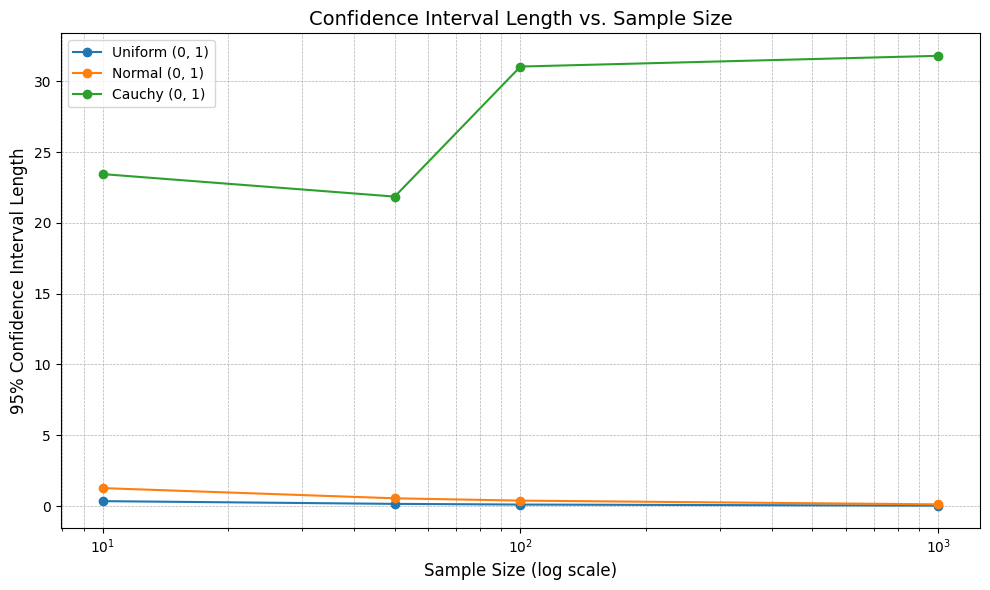

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_and_plot_confidence_intervals():
    sample_sizes = [10, 50, 100, 1000]

    num_iterations = 1000

    distributions = {
        "Uniform (0, 1)": lambda size: np.random.uniform(0, 1, size),
        "Normal (0, 1)": lambda size: np.random.normal(0, 1, size),
        "Cauchy (0, 1)": lambda size: np.random.standard_cauchy(size)
    }

    ci_lengths = {dist_name: [] for dist_name in distributions}

    for dist_name, dist_func in distributions.items():
        for n in sample_sizes:
            sample_means = []
            for _ in range(num_iterations):
                samples = dist_func(n)
                sample_means.append(np.mean(samples))

            lower_bound = np.percentile(sample_means, 2.5)
            upper_bound = np.percentile(sample_means, 97.5)
            interval_length = upper_bound - lower_bound

            ci_lengths[dist_name].append(interval_length)

    plt.figure(figsize=(10, 6))
    for dist_name, lengths in ci_lengths.items():
        plt.plot(sample_sizes, lengths, marker='o', label=dist_name)

    plt.xscale("log")  # Scale sample size axis logarithmically
    plt.xlabel("Sample Size (log scale)", fontsize=12)
    plt.ylabel("95% Confidence Interval Length", fontsize=12)
    plt.title("Confidence Interval Length vs. Sample Size", fontsize=14)
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()

calculate_and_plot_confidence_intervals()


### Theoretical question 1
### 1.1 : <br> 
well the monte carlo method basis is to increase the sample size in order to increase the accuracy of the estimation , if there is no assurance that the increase in sample size will lead to better accuracy then the method is not really a good method ! this assurance comes from the LLN.<br>
### 1.2 : <br>
CLT tells us that increasing the number of samples of any random variable leads to this normal distriution that has a decreasing variance with the increase of sample size , <br>
which is a good reassurance if you want to estimate the mean of a random variable with almost every distribution you like!<br>
### 1.3 : <br>
yes , as we saw in the last question , a finite variance is essential for CLT to work which itself is essential for monte carlo !

 

### Theoretical question 2 
### 2.1 : <br>

\begin{align*}
P(r) &= \sum_{i=1}^{n} \mathbb{P}(\text{applicant } i \text{ is selected} \cap \text{applicant } i \text{ is the best}) \\
&= \sum_{i=1}^{n} \mathbb{P}(\text{applicant } i \text{ is selected}|\text{applicant } i \text{ is the best}) \cdot \mathbb{P}(\text{applicant } i \text{ is the best}) \\
&= \left[ \sum_{i=1}^{r-1} 0 + \sum_{i=r}^{n} \mathbb{P}\left( \begin{array}{c} \text{the best of the first } i-1 \text{ applicants} \\ \text{is in the first } r-1 \text{ applicants} \end{array} \bigg| \text{applicant } i \text{ is the best} \right) \right] \cdot \frac{1}{n} \\
&= \left[ \sum_{i=r}^{n} \frac{r-1}{i-1} \right] \cdot \frac{1}{n} \\
&= \frac{r-1}{n} \sum_{i=r}^{n} \frac{1}{i-1}
\end{align*}

### 2.2 : <br>

\begin{align*}
    & \frac{r - 1}{n} \sum_{i=r}^n \frac{1}{i - 1}. \\
    & \text{We approximate the discrete sum by a Riemman sum : } \\
    & \sum_{i=r}^n \frac{1}{i - 1} \approx \int_r^n \frac{1}{x - 1} \, dx. \\
    & \int_r^n \frac{1}{x - 1} \, dx = \ln|x - 1| \Big|_r^n = \ln(n - 1) - \ln(r - 1) = \ln\left(\frac{n - 1}{r - 1}\right). \\
    & f(r) = \frac{r - 1}{n} \ln\left(\frac{n - 1}{r - 1}\right). \\
    & \text{Derive to find the optimum r : } \\
    & f'(r) = \frac{1}{n} \left[ \ln\left(\frac{n - 1}{r - 1}\right) - 1 \right]. \\
    & \ln\left(\frac{n - 1}{r - 1}\right) - 1 = 0. \\
    & \text{Solve for } r: \\
    & \ln\left(\frac{n - 1}{r - 1}\right) = 1. \\
    & \frac{n - 1}{r - 1} = e. \\
    & r - 1 = \frac{n - 1}{e}. \\
    & r = \frac{n - 1}{e} + 1. \\ 
    & r \approx \frac{n}{e}.
\end{align*}

### 2.3 : <br>
$$
f(\frac{n}{e}) = \frac{\frac{n}{e} - 1}{n} \ln\left(\frac{n - 1}{\frac{n}{e} - 1}\right) \approx \frac{1}{e}.
$$



### Theoretical question 3 <br>

### 3.1 : <br>

\begin{align*}
    &F_D(x) = \frac{x-a}{b-a} \\
    &\text{Therefore :} \\
    &F_{\text{Max}}(x) = P(v_1 \leq b, v_2 \leq b, \ldots, v_n \leq b) \\
    &= F_D(x)^N\\
    &= (\frac{x-a}{b-a})^N\\
    &\text{Therefore :} \\
    &E[\max(v_i)] = \int_{a}^{b} 1-(\frac{x-a}{b-a})^N \,dx \\
    &= \frac{Nb + a}{N+1}
\end{align*}

### 3.2 : <br>

if the sale is at random , than $ E[\text{Random sale}] = E[\text{D}] = \frac{a+b}{2} $ .


### Theoretical qeustion 4 <br>

### 4.1 <br>



Let 
$$
T \;=\; \text{number of offers you skip} \;\approx\; \frac{N}{e}.
$$
Denote 
$$
M_1 \;=\; \max\{V_1, V_2, \dots, V_T\},
$$
the maximum among the first $T$ (skipped) offers.  Then:

$$
1 - M_1^{\,N - T}
$$
there **is** at least one offer among the last $N - T$ that exceeds $M_1$.  
    - In that event, you accept the *first* such exceedance.  
    - Conditioned on “an exceedance occurs,” that new offer is uniform on $$[M_1, 1]$$, so its conditional expectation is $\tfrac{1 + M_1}{2}.$


$$
M_1^{\,N - T}
$$
*nobody* in the last $N - T$ beats $M_1$.

Hence, given $M_1 = x$, your expected payoff is
$$
\mathbb{E}[\text{final} \mid M_1 = x]
\;=\;
\bigl(1 - x^{\,N-T}\bigr)\,\frac{x+1}{2}
\;+\;
x^{\,N-T}\,\frac{x}{2}.
$$

$$
\mathbb{E}[V]
\;=\;
\int_{0}^{1}
\Bigl[\bigl(1 - x^{\,N-T}\bigr)\,\tfrac{x+1}{2}
\;+\;
x^{\,N-T}\,\tfrac{x}{2}\Bigr]
\;\bigl[T\,x^{\,T-1}\bigr]
\;dx.
$$

Set 
$$
T = sN,\quad 
\text{where for the strategy in question, }s = \frac{1}{e}.
$$
Hence $N - T = (1-s)N.$

$$
\lim_{N \to \infty} 
\mathbb{E}[V]
\;=\;
1 - \frac{s}{2}.
$$

Plugging in $s = 1/e$, you get

$$
\lim_{N\to\infty}\mathbb{E}[V]
\;=\;
1 \;-\; \frac{1}{2e}
\;\approx\;
0.816.
$$

If instead each offer is uniform on $$[a,b]$$, then a simple linear rescaling shows that

$$
\mathbb{E}[\text{accepted offer}]
\;=\;
a
\;+\;
(b-a)\,\bigl(\text{expected value on }\bigr)
\;=\;
a \;+\; (b-a)\Bigl(1 - \tfrac{1}{2e}\Bigr).
$$

$$
\boxed{\;
\mathbb{E}[V]
\;\approx\;
a \;+\; 0.816\,\bigl(b - a\bigr)
\;=\;
a \;+\;(b-a)\bigl(1 - \tfrac{1}{2e}\bigr).
\;}
$$

### 4.2 : <br>

comparing the ratio of our expexted gain to the upper and lower bound : <br>

$$ \frac{a+b}{2} \; < 0.816b - 0.184a \; < \frac{Nb+a}{N+1} $$


### Simulation question 2 :

In [6]:
import numpy as np
import math

def process_samples(N):
    samples = np.random.uniform(0, 1, N)
    
    random_sample = np.random.choice(samples)
    
    max_sample = np.max(samples)
    
    threshold_index = math.ceil(N / math.e)  # Calculate N/e and round up
    first_part = samples[:threshold_index]  # First N/e samples
    threshold_value = np.max(first_part)    # Maximum of the first N/e samples
    
    result_index = -1  # Default if no such value is found
    for i in range(threshold_index, N):
        if samples[i] > threshold_value:
            result_index = i
            break
    
    if result_index != -1:
        first_greater_after_ne = samples[result_index]
    else:
        first_greater_after_ne = samples[N-1]
    
    return {
        "N": N,
        "Random Sample": random_sample,
        "Maximum": max_sample,
        "Threshold Value (Max of first N/e)": threshold_value,
        "First Greater After N/e": first_greater_after_ne
    }

for N in [10, 50, 100]:
    results = process_samples(N)
    print(f"\nResults for N = {N}:")
    for key, value in results.items():
        print(f"{key}: {value}")



Results for N = 10:
N: 10
Random Sample: 0.12564111525191157
Maximum: 0.9552665644896726
Threshold Value (Max of first N/e): 0.9541661374573579
First Greater After N/e: 0.9552665644896726

Results for N = 50:
N: 50
Random Sample: 0.19267237114411684
Maximum: 0.9436822239022287
Threshold Value (Max of first N/e): 0.9023983196021564
First Greater After N/e: 0.9436822239022287

Results for N = 100:
N: 100
Random Sample: 0.8413323901815305
Maximum: 0.9909425771347363
Threshold Value (Max of first N/e): 0.9909425771347363
First Greater After N/e: 0.8718744893918284


### Theoretical question 5 : 

# 5.1 : 
$$ E[\text{Gain}] = (1 - \epsilon) \ \frac{b + \tau}{2} + \epsilon \ \frac{b + a}{2} \; , \; \epsilon = (\frac{\tau - a}{b - a})^N $$




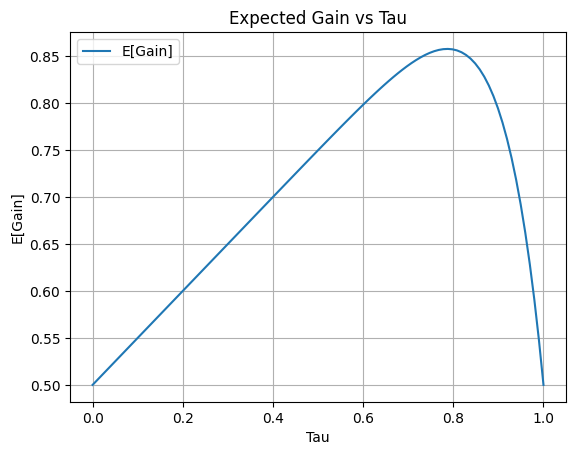

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 0
b = 1
N = 10
tau_values = np.linspace(a, b, 100)  # Generate 100 points between a and b

# Compute E[Gain] for each tau
E_Gain = []
for tau in tau_values:
    epsilon = ((tau - a) / (b - a)) ** N
    expected_gain = (1 - epsilon) * (b + tau) / 2 + epsilon * (b + a) / 2
    E_Gain.append(expected_gain)

# Plot the result
plt.plot(tau_values, E_Gain, label='E[Gain]')
plt.xlabel('Tau')
plt.ylabel('E[Gain]')
plt.title('Expected Gain vs Tau')
plt.legend()
plt.grid()
plt.show()


### 5.2 :<br>
$$ \epsilon = (\frac{\tau - a}{b - a})^N \; , \text{Therefore}\; \tau = 0.86(b-a) + a$$
### 5.3 :<br>
for simplification we assume $a = 0 , b = 1$ therefore we'll have : 
$$ E[\text{Gain}] = (1 - \epsilon) \ \frac{1 + \tau}{2} +  \frac{\epsilon}{2} \; , \; \epsilon = \tau^N $$

$$\frac{dE[Gain]}{d\tau} = -N\tau^{N-1} \frac{1+\tau}{2} + \frac{1}{2} - \frac{\tau^N}{2} + \frac{N\tau^{N-1}}{2}$$

$$\frac{dE[Gain]}{d\tau} = 0 \; \rightarrow \; 1 - (N+1)\tau^N = \ 0 $$

$$\tau = (\frac{1}{N+1})^\frac{1}{N}$$

$$\text{Intrestingly enough} \lim_{N \to 0} \tau = \frac{1}{e}




### Simulation question 3.1 :

The results show that having some info on the subject will help us tremendously in our decision making.



In [11]:
import numpy as np

num_samples = 50
num_repeats = 50


epsilon_05 = 0.05**0.02
epsilon_opt = (1/51)**(1/50)

def find_first_greater_than_or_last(samples, threshold):
    for value in samples:
        if value > threshold:
            return value
    return samples[-1]  

results_epsilon_05 = []
results_epsilon_opt = []

for _ in range(num_repeats):
    samples = np.random.uniform(0, 1, num_samples)
    
    first_greater_05 = find_first_greater_than_or_last(samples, epsilon_05)
    first_greater_opt = find_first_greater_than_or_last(samples, epsilon_opt)
    
    results_epsilon_05.append(first_greater_05)
    results_epsilon_opt.append(first_greater_opt)

mean_epsilon_05 = np.mean(results_epsilon_05)
mean_epsilon_opt = np.mean(results_epsilon_opt)

print(f"Mean for epsilon = 0.05: {mean_epsilon_05}")
print(f"Mean for optimal epsilon: {mean_epsilon_opt}")


Mean for epsilon = 0.05: 0.9371086531989197
Mean for optimal epsilon: 0.9431620919905837


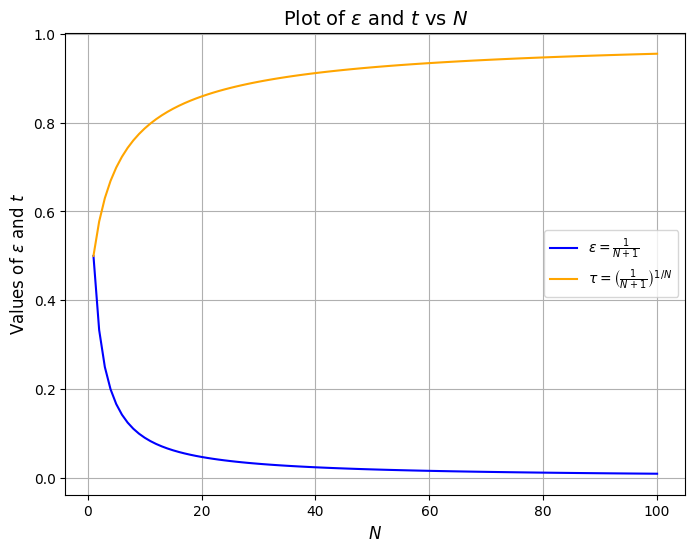

In [13]:
import numpy as np
import matplotlib.pyplot as plt

N_values = np.arange(1, 101)  

epsilon_values = 1 / (N_values + 1)
tau_values = epsilon_values**(1 / N_values)

plt.figure(figsize=(8, 6))
plt.plot(N_values, epsilon_values, label=r'$\epsilon = \frac{1}{N+1}$', color='blue')
plt.plot(N_values, tau_values, label=r'$\tau = \left(\frac{1}{N+1}\right)^{1/N}$', color='orange')

plt.title('Plot of $\epsilon$ and $t$ vs $N$', fontsize=14)
plt.xlabel('$N$', fontsize=12)
plt.ylabel('Values of $\epsilon$ and $t$', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


### Theoretical question 6 

### 6.1 :<br>


$$
   f(x; a, b) = 
   \begin{cases} 
   \frac{1}{b-a} & \text{if } a \leq x \leq b, \\
   0 & \text{otherwise.}
   \end{cases}
$$

For a given dataset ${x_1, x_2, \ldots, x_r}$ of size $r$, the likelihood function is:
$$
   L(a, b) = \prod_{i=1}^r f(x_i; a, b) = 
   \begin{cases} 
   \left(\frac{1}{b-a}\right)^r & \text{if } a \leq \min(x_i) \text{ and } b \geq \max(x_i), \\
   0 & \text{otherwise.}
   \end{cases}
$$

The Maximum Likelihood Estimates (MLE) for the parameters \(a\) and \(b\) are:
$$
\hat{a} = \min(x_1, x_2, \ldots, x_r),
$$
$$
\hat{b} = \max(x_1, x_2, \ldots, x_r).
$$



### 6.2 : <br>

as we had in the last question : $$\epsilon = (\frac{\tau - a}{b - a})^N $$ only in this case $ a = \hat{a} \; , \; b = \hat{b} $

### 6.3 : <br>

to find the optimum value for $\tau$ we have to calculate the maxima of $ E[\text{Gain}] = (1 - \epsilon) \ \frac{b + \tau}{2} + \epsilon \ \frac{b + a}{2} $ which is solvable numerically when a,b are known.

### Simulation question 4 :

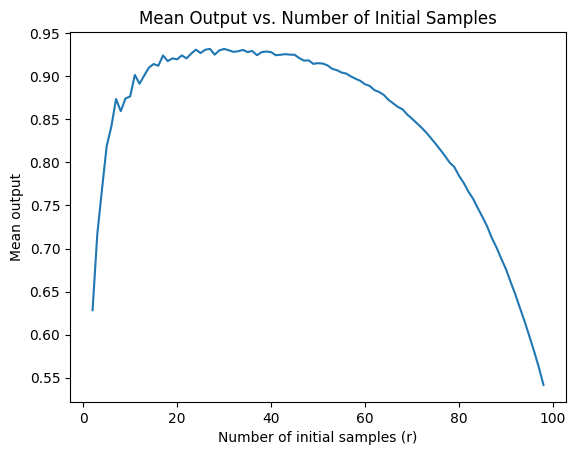

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def expected_gain(tau , a , b , N):
        epsilon = ((tau - a) / (b - a)) ** N
        return (1 - epsilon) * (b + tau) / 2 + epsilon * (b + a) / 2

def find_tau(a, b, N):
    def expected_gain(tau):
        epsilon = ((tau - a) / (b - a)) ** N
        return (1 - epsilon) * (b + tau) / 2 + epsilon * (b + a) / 2
    tau_values = np.linspace(a, b, 500)  # Sample tau values
    best_tau = tau_values[np.argmax([expected_gain(t) for t in tau_values])]
    return best_tau

def simulate_and_find_output(r, N):
    samples = np.random.rand(N)
    a = np.min(samples[:r])
    b = np.max(samples[:r])
    tau = find_tau(a, b, N)
    return expected_gain(tau , a , b , N-r)

def main():
    N = 100  # Total number of samples
    num_simulations = 200
    r_values = range(2, 99)
    output_means = []

    for r in r_values:
        outputs = [simulate_and_find_output(r, N) for _ in range(num_simulations)]
        output_means.append(np.mean(outputs))

    plt.plot(r_values, output_means)
    plt.xlabel("Number of initial samples (r)")
    plt.ylabel("Mean output")
    plt.title("Mean Output vs. Number of Initial Samples")
    plt.show()

if __name__ == "__main__":
    main()

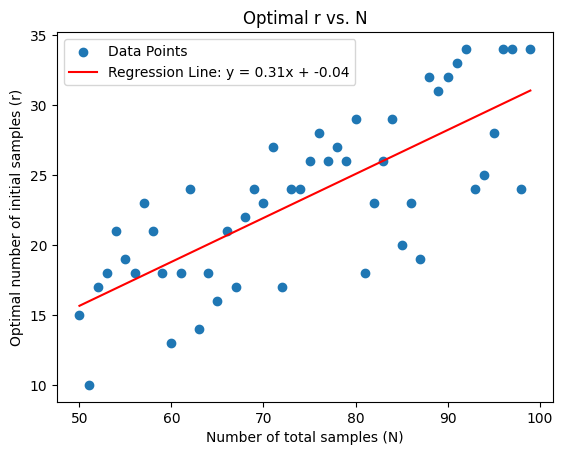

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def find_tau(a, b, N):
    
    def expected_gain(tau):
        epsilon = ((tau - a) / (b - a)) ** N
        return (1 - epsilon) * (b + tau) / 2 + epsilon * (b + a) / 2

    tau_values = np.linspace(a, b, 100)  # Sample tau values
    best_tau = tau_values[np.argmax([expected_gain(t) for t in tau_values])]
    return best_tau

def simulate_and_find_output(r, N):
    samples = np.random.rand(N)
    a = np.min(samples[:r])
    b = np.max(samples[:r])
    tau = find_tau(a, b, N)
    return expected_gain(tau , a , b , N-r)

def main():
    num_simulations = 40
    N_values = range(50, 100)  # N ranging from 100 to 300
    optimal_r_values = []

    for N in N_values:
        r_values = range(5,N-10)
        output_means = []
        for r in r_values:
            outputs = [simulate_and_find_output(r, N) for _ in range(num_simulations)]
            output_means.append(np.mean(outputs))
        optimal_r = r_values[np.argmax(output_means)]
        optimal_r_values.append(optimal_r)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(N_values, optimal_r_values)

    # Create the plot
    plt.scatter(N_values, optimal_r_values, marker='o', label='Data Points')
    plt.plot(N_values, slope * np.array(N_values) + intercept, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}') 

    plt.xlabel("Number of total samples (N)")
    plt.ylabel("Optimal number of initial samples (r)")
    plt.title("Optimal r vs. N")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

This results are very compatible with our expextations and the results that we got in the secretary problem which is that the optimal r falls close to N/e in very big N

### Simulation question 5 :


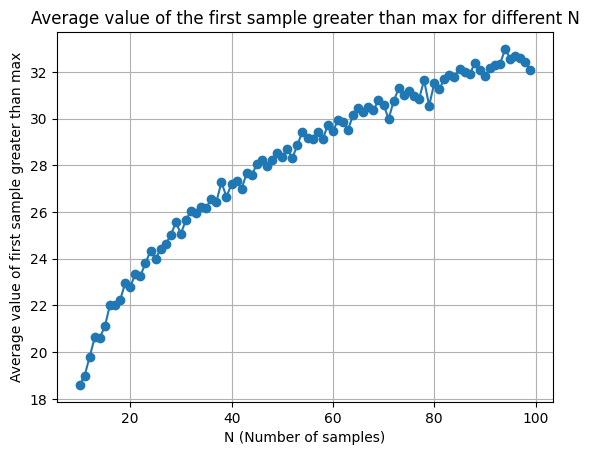

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def find_first_greater_than_max(N):
    samples = np.random.exponential(1 / 0.1, N)
    
    r = int(N / np.e)
    
    max_first_r = np.max(samples[:r])
    
    greater_than_max = next((x for x in samples[r:] if x > max_first_r), samples[-1])
    
    return greater_than_max

results = []

for N in range(10, 100):
    outputs = []
    
    for _ in range(5000):
        output = find_first_greater_than_max(N)
        outputs.append(output)
    
    results.append(np.mean(outputs))

plt.plot(range(10, 100), results, marker='o')
plt.xlabel('N (Number of samples)')
plt.ylabel('Average value of first sample greater than max')
plt.title('Average value of the first sample greater than max for different N')
plt.grid(True)
plt.show()


### 5.2 : 

the MLE for $\lambda$ is the reciprocal of the sample mean:

$$
\hat{\lambda} = \frac{1}{\text{mean}(x_1, x_2, \dots, x_r)}
$$

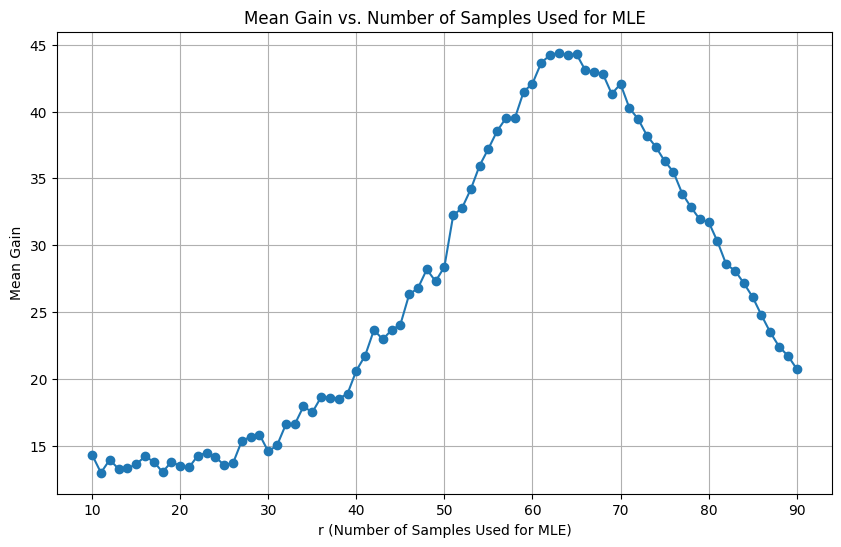

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mle_lambda(samples):
    return 1 / np.mean(samples)

def find_gain(samples, z):
    greater_samples = samples[samples > z]
    return greater_samples[0] if greater_samples.size > 0 else samples[-1]

true_lambda = 0.1
num_samples = 100
num_trials = 1000
r_values = range(10, 91)

mean_gains = []

for r in r_values:
    gains = []
    
    for _ in range(num_trials):
        samples = np.random.exponential(1/true_lambda, num_samples)
        
        estimated_lambda = mle_lambda(samples[:r])
        
        z = -np.log(0.9)*(num_samples-r) / (estimated_lambda)
        
        gain = find_gain(samples, z)
        gains.append(gain)
    
    mean_gains.append(np.mean(gains))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(r_values, mean_gains, marker='o', linestyle='-')
plt.xlabel("r (Number of Samples Used for MLE)")
plt.ylabel("Mean Gain")
plt.title("Mean Gain vs. Number of Samples Used for MLE")
plt.grid()
plt.show()


### Upper bound of expextation

To compute $ E[\max\{V_i\}] $ using the expectation formula:

$$
E[X] = \int_0^\infty P(X > x) \, dx
$$

we have : 
$$
F_V(x) = 1 - e^{-0.1 x}.
$$

The probability that a single $ V_i $ exceeds $ x $ is:

$$
P(V_i > x) = e^{-0.1 x}.
$$

Since $ V_{\max} = \max\{V_1, V_2, ..., V_{100}\} $, we use the fact that:

$$
P(V_{\max} > x) = 1 - P(V_{\max} \leq x) = 1 - (P(V_i \leq x))^{100}.
$$

Since $ P(V_i \leq x) = F_V(x) = 1 - e^{-0.1 x} $, we get:

$$
P(V_{\max} > x) = 1 - (1 - e^{-0.1 x})^{100}.
$$

$$
E[V_{\max}] = \int_0^\infty \left[ 1 - (1 - e^{-0.1 x})^{100} \right] dx.
$$

This integral is best evaluated numerically. Let's compute it.

In [23]:
import scipy.integrate as spi
import numpy as np

# Define the function P(Vmax > x)
lambda_ = 0.1
n = 100

def P_Vmax_gt_x(x):
    return 1 - (1 - np.exp(-lambda_ * x))**n

# Compute the integral
expected_max, error = spi.quad(P_Vmax_gt_x, 0, np.inf)

expected_max


51.873775176396144

The expected value of the maximum, $ E[\max\{V_i\}] $, is approximately **51.87**.<br>
and the **Lower bound** Which is obtained from the random sale strategy is , $ E[V] = \frac{1}{\lambda} = 10$ <br>
lets compare them ! <br> 
the mean gain from choosing the optimal r in 5.2 is about **45** which is an extremely good result and is very close to the upper bound which is **51.87**<br>
the gain from using the secretary strategy for N = 100 is much lower and is around **32**

## A NEW MECHANISM

another approach would be too use bayesian estimation to update our knowledge of the distribution when we recieve new offers . <br>
the math behind the relation of the prior and posterior distrbution would look like this : <br>
### Prior and Posterior distributions
For an exponential likelihood, the natural conjugate prior for $\lambda$ is the Gamma distribution. That is, you start with a prior
$$
\lambda\sim \operatorname{Gamma}(\alpha_0,\beta_0).
$$
Each time you observe an offer \(x\) (and possibly decide not to sell), you can update your posterior. For example, if you observe offers \(x_1,\dots,x_k\), then the posterior for $\lambda$ is
$$
\lambda\mid x_1,\dots,x_k\sim \operatorname{Gamma}\Bigl(\alpha_0 + k,\,\beta_0+\sum_{i=1}^k x_i\Bigr).
$$
You can then use the posterior mean
$$
\hat\lambda = \frac{\alpha_0+k}{\beta_0+\sum_{i=1}^k x_i}
$$


### Evaluating the threshold price
suppose there are $n\ge 1$ customers remaining. When the next customer makes an offer $x$, you have two possibilities:
- **Sell now:** Receive $x$.
- **Wait:** Reject $x$ and obtain, on average, $v(n-1)$ from the remaining $n-1$ customers.

Thus, if you adopt a threshold (or reservation‐price) rule you should sell if the offer is at least as good as what you expect from waiting. In other words, you define a reservation price $r_n$ (with
$$
r_n=v(n-1)
$$
by the principle of optimality) and you accept any offer $x\ge r_n$.

Then your expected revenue when there are $n$ customers left is
$$
v(n) = E\Bigl[\max\{x,\, v(n-1)\}\Bigr].
$$
Since the offers are drawn from $f(x)=\lambda e^{-\lambda x}$, we can write
$$
v(n) = \int_{0}^{v(n-1)} v(n-1) \,\lambda e^{-\lambda x}\,dx + \int_{v(n-1)}^\infty x\,\lambda e^{-\lambda x}\,dx.
$$
Notice that the first term accounts for offers that are too low (so you get the continuation value $v(n-1)$) and the second term for offers that are high enough that you sell immediately.<br>
simplyfing this recursive equation leads us to : 
$$
\boxed{v(n) = v(n-1) + \frac{e^{-\lambda v(n-1)}}{\lambda}}.
$$

### Additional info on $\lambda$

having some additional info would be very helpful! we can adjust the parameters for our prior distribution based on the info .
$$
\lambda\sim \operatorname{Gamma}(\alpha_0,\beta_0).
$$
(in the case of no prior info we can set $ \alpha \to 1, \beta \to 0 $)

### Comparing with other strategies

this strategy at least in my view of it looks more promising because it allows a dynamic update of the treshold price , it can help implement any prior knowledge of lambda and it assesses and updates the lambda parameter throughout the whole sale proccess. 

In [45]:
import numpy as np

def compute_dp(num_offers, lambda_est):
    
    dp = np.zeros(num_offers + 1)
    for k in range(1, num_offers + 1):
        dp[k] = dp[k-1] + np.exp(-lambda_est * dp[k-1]) / lambda_est
    return dp

N = 25                  
true_lambda = 0.1       
num_simulations = 1000 
observation_period = 5

alpha0 = 0.001  
beta0  = 0.001  

sale_prices = np.zeros(num_simulations)

for sim in range(num_simulations):
    alpha = alpha0
    beta = beta0

    sale_made = False

    offers = np.random.exponential(scale=1/true_lambda, size=N)

    for i in range(observation_period):
        alpha += 1
        beta  += offers[i]

    for i in range(observation_period, N):
        remaining = N - i

        alpha += 1
        beta  += offers[i]
        
        lambda_est = alpha / beta
        
        dp = compute_dp(remaining, lambda_est)
        threshold = dp[remaining - 1]
        
        offer = offers[i]

        if offer >= threshold:
            sale_prices[sim] = offer
            sale_made = True
            break
        else:
            alpha += 1
            beta  += offer

    if not sale_made:
        sale_prices[sim] = offers[-1] 

mean_gain = np.mean(sale_prices)
variance_gain = np.var(sale_prices)

print("Mean gain:", mean_gain)
print("Variance of gain:", variance_gain)
print(sale_prices[:10])


Mean gain: 29.473099364388755
Variance of gain: 185.93162231878551
[22.39326039 25.31662256 27.23527673 12.10149868 14.86432134 39.34096865
 26.97551372 33.40658134 31.86661205 34.55198066]
